Inspiration: Udemy "Customer Analytics in Python" Link: https://www.udemy.com/course/customer-analytics-in-python/

Context: This is customer purchase data for performing purchase behavior analysis.

Objective: The goal is to better understand customer behavior, via analyze/segment purchase patterns: visits, purchases, and brand preference.  

Steps performed in this script:
Data transformation: 
  1. Used models trained from customer table(scaler, PCA, K_means PCA), to ensure consistency in analysis.
  2. Applied the model to this new purchase data to transform/predict, putting customers into pre-defined segments.

Descriptive analysis:
  1. Customer-level insights: Key metrics per customer like number of visits, total and avg purchases.
  2. Segment distribution: Pie chart to show customer groups composition.
  3. Per-segment analysis: means and std of key metrics like visits and purchases each group.
  4. Brand preference and revenue: Heatmap for brand choice, then rev. breakdown per brand and segment.
  

Next step:
After understanding customer behaviors, we are ready to move to predictive modeling - to forecast future customer actions and optimize marketing strategies.

𝐋𝐢𝐛𝐫𝐚𝐫𝐢𝐞𝐬

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

𝐃𝐚𝐭𝐚 𝐈𝐦𝐩𝐨𝐫𝐭

In [2]:
df_purchase=pd.read_csv('purchase data.csv')

In [3]:
df_purchase.head()
# pre-processed, encoded all variables numerically, dealt missing 
# resitricted the volumne of the dataset, and protected the privacy of customers.

# Incidense - will a customer buy a product?
# Brand - which brand chosed?
# Quantilty - how much?

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

𝐃𝐚𝐭𝐚 𝐒𝐞𝐠𝐦𝐞𝐧𝐭𝐚𝐭𝐢𝐨𝐧

𝐈𝐦𝐩𝐨𝐫𝐭 𝐒𝐞𝐠𝐦𝐞𝐧𝐭𝐚𝐭𝐢𝐨𝐧 𝐌𝐨𝐝𝐞𝐥

In [5]:
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [6]:
pca = pickle.load(open('pca.pickle', 'rb'))

In [7]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

𝐒𝐭𝐚𝐧𝐝𝐚𝐫𝐝𝐢𝐳𝐚𝐭𝐢𝐨𝐧

In [8]:
features=df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std=scaler.transform(features)

𝐏𝐂𝐀

In [9]:
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)

𝐊-𝐦𝐞𝐚𝐧𝐬 𝐏𝐂𝐀

In [10]:
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)

In [11]:
df_purchase_predictors = df_purchase.copy()

In [12]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

In [13]:
df_purchase_predictors['Segment'].unique()

array([2, 3, 1, 0], dtype=int32)

In [14]:
print(df_purchase_segm_pca)

[[ 0.36215223 -0.63955673  1.46270631]
 [ 0.36215223 -0.63955673  1.46270631]
 [ 0.36215223 -0.63955673  1.46270631]
 ...
 [ 0.3617637  -0.7398037   1.15875419]
 [ 0.3617637  -0.7398037   1.15875419]
 [ 0.3617637  -0.7398037   1.15875419]]


𝐃𝐞𝐬𝐜𝐫𝐢𝐩𝐭𝐢𝐯𝐞 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐛𝐲 𝐒𝐞𝐠𝐦𝐞𝐧𝐭𝐬

𝐃𝐚𝐭𝐚 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐛𝐲 𝐂𝐮𝐬𝐭𝐨𝐦𝐞𝐫

In [15]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [16]:
temp1=df_purchase_predictors[['ID','Incidence']].groupby(['ID']).count()
temp1=temp1.rename(columns={'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [17]:
temp2=df_purchase_predictors[['ID','Incidence']].groupby(['ID']).sum()
temp2=temp2.rename(columns={'Incidence':'N_Purchases'})
temp3=temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [18]:
temp3['Average_N_Purchases']=temp3['N_Purchases']/temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [19]:
temp4=df_purchase_predictors[['ID','Segment']].groupby(['ID']).mean()
df_purchase_descr=temp3.join(temp4)
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


𝐒𝐞𝐠𝐦𝐞𝐧𝐭 𝐏𝐫𝐨𝐩𝐨𝐫𝐭𝐢𝐨𝐧𝐬

In [20]:
segm_prop=df_purchase_descr[['N_Purchases','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]
segm_prop=segm_prop.rename(columns={'N_Purchases':'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


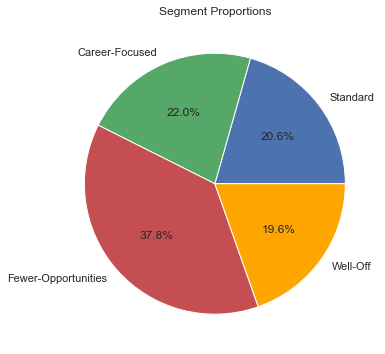

In [21]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportions'],
        labels=['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct='%1.1f%%',
        colors=('b','g','r','orange'))
plt.title('Segment Proportions');

#         So, '%1.1f%%' means:
#         Display the number as a floating-point number.
#         The number should be at least one digit wide.
#         Display one digit after the decimal point.
#         Append a percentage sign at the end.

𝐏𝐮𝐫𝐜𝐡𝐚𝐬𝐞 𝐎𝐜𝐜𝐚𝐬𝐢𝐨𝐧 𝐚𝐧𝐝 𝐏𝐮𝐫𝐜𝐡𝐚𝐬𝐞 𝐈𝐧𝐜𝐢𝐝𝐞𝐧𝐜𝐞

In [22]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [23]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

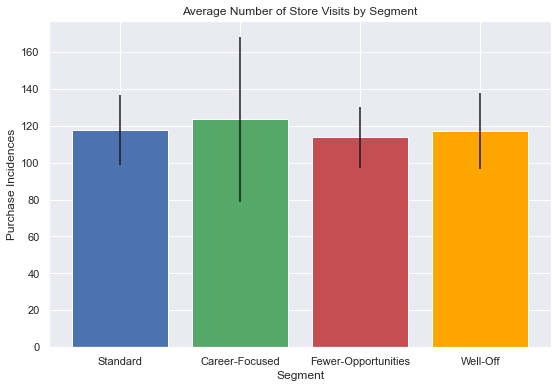

In [24]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        #Error bars representing the standard deviation of the number of store visits for each segment.
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Store Visits by Segment');

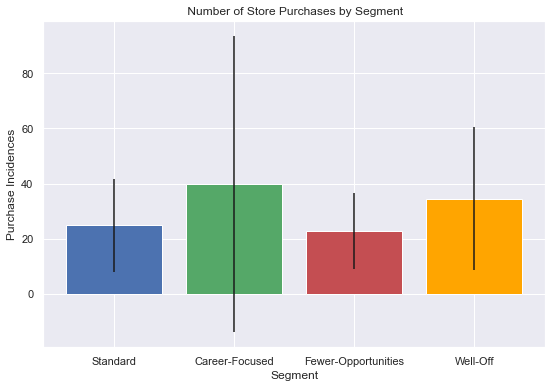

In [25]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        #Error bars representing the standard deviation of the number of store visits for each segment.
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title(' Number of Store Purchases by Segment');

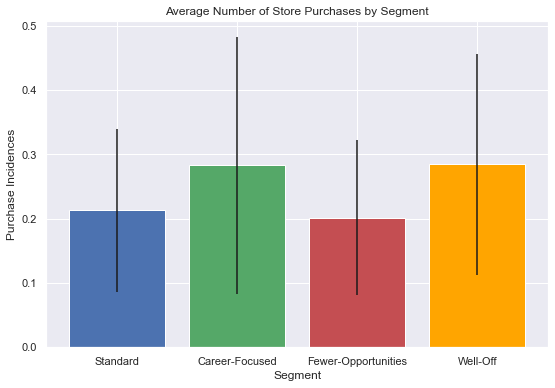

In [26]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['Average_N_Purchases'],
        yerr = segments_std['Average_N_Purchases'],
        #Error bars representing the standard deviation of the number of store visits for each segment.
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Store Purchases by Segment');

𝐁𝐫𝐚𝐧𝐝 𝐂𝐡𝐨𝐢𝐜𝐞

In [27]:
df_purchase_incidence=df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [28]:
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,2
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,2
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,2
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,2
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,2


In [29]:
brand_dummies=pd.get_dummies(df_purchase_incidence['Brand'],prefix='Brand',prefix_sep='_')
brand_dummies['Segment'],brand_dummies['ID']=df_purchase_incidence['Segment'],df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [30]:
temp=brand_dummies.groupby(['ID'],as_index=True).mean()
temp

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.000000,0.222222,0.222222,2
200000002,0.000000,0.090909,0.000000,0.909091,0.000000,3
200000003,0.000000,0.800000,0.000000,0.000000,0.200000,2
200000004,0.000000,0.090909,0.000000,0.000000,0.909091,2
200000005,0.000000,0.000000,0.000000,0.000000,1.000000,1
...,...,...,...,...,...,...
200000496,0.050000,0.700000,0.000000,0.050000,0.200000,0
200000497,0.023256,0.651163,0.000000,0.302326,0.023256,2
200000498,0.128205,0.589744,0.282051,0.000000,0.000000,0


In [31]:
mean_brand_choice=temp.groupby(['Segment'],as_index=True).mean()
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0,0.251186,0.396502,0.156481,0.059474,0.136357
1,0.072871,0.146808,0.039976,0.112395,0.627951
2,0.137567,0.681190,0.020923,0.061548,0.098772
3,0.041928,0.117422,0.030610,0.613623,0.196417


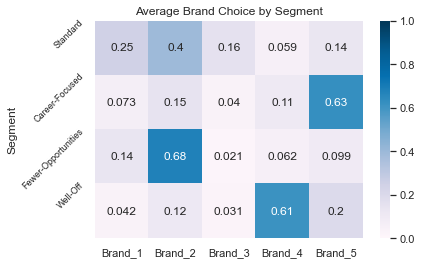

In [32]:
sns.heatmap(mean_brand_choice,
            vmin=0,
            vmax=1,
            cmap='PuBu',
            annot=True)
plt.yticks([0,1,2,3],['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],rotation=45,fontsize=9)
plt.title('Average Brand Choice by Segment')
plt.show()

𝐑𝐞𝐯𝐞𝐧𝐮𝐞

In [33]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==1].copy()
temp.loc[:,'Revenue Brand 1']=temp['Price_1']*temp['Quantity']
segments_brand_revenue=pd.DataFrame()
segments_brand_revenue[['Segment','Revenue Brand 1']]=temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

# num_unique_columns = temp.shape[1]
# column_names = temp.columns.tolist()
# print(f"Column names: {column_names}")

,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [34]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2].copy()
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

In [35]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3].copy()
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

In [36]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4].copy()
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

In [37]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5].copy()
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

In [38]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [39]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
